In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set figures Properties
params={"figure.figsize":(13,8),'axes.titlesize':20,
         'xtick.labelsize':20,
         'ytick.labelsize':20,'axes.labelsize':20}
plt.rcParams.update(params)

In [4]:
# Load raw data
Frequency, Time, Amplitude = np.loadtxt('../5.raw.cube', unpack=True)

In [5]:
# Observing parameters for the raw data
observing_time = 2000 #ms
xleng = int(Time.max() + 1)
t_res = observing_time/xleng

In [6]:
# Create data cube with the desired time res
def filterbank(time_res, amp, time_points, obs_time = 2000): # obs in ms
    
        # nb of data points for each freq
        n_point = obs_time/time_res

        # nb of data points to sum to get the time res
        to_sum = int(time_points/n_point)

        Filterbank = []

        # Loop over the amp value
        for i in range(time_points, len(amp)+1, time_points):

            Mean = []
            Data_chan = amp[i-time_points:i]
           
            # perform the sum
            for j in range(to_sum, len(Data_chan)+1, to_sum):

                Mean.append(np.mean(Data_chan[j-to_sum:j]))

            # Reshape the array to one dimensional
            Mean = np.reshape(np.array(Mean),[len(Mean)])
            Filterbank.append(Mean)

        return np.array(Filterbank)

In [49]:
cube = filterbank(3,Amplitude, xleng)

Text(0.5, 1.0, 'FRB010125')

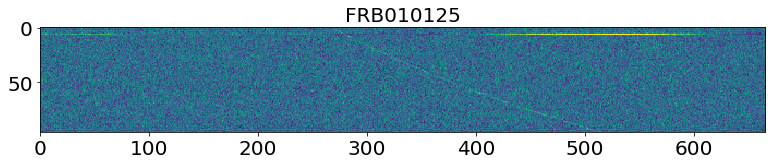

In [50]:
plt.imshow(cube)
plt.title('FRB010125')

In [48]:
# Convert to 5 ms 
np.savetxt('FRB010125_4ms_txt', cube, delimiter=',')